In [11]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv("../data/data.csv", sep=",")

X = df.loc[:, df.columns != "is_alarm"]
y = df["is_alarm"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = DecisionTreeClassifier()

param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}
search = GridSearchCV(model, param_grid=param_grid, scoring="accuracy", n_jobs=-1, cv=5)

search.fit(X_train, y_train)
best_params = search.best_params_
model_tuned = DecisionTreeClassifier(**best_params)
model_tuned.fit(X_train, y_train)

with open('decision-tree-classifier.pkl', 'wb') as handle:
    pickle.dump(model_tuned, handle, protocol=pickle.HIGHEST_PROTOCOL)

y_pred = model_tuned.predict(X)

accuracy = accuracy_score(y, y_pred)

print(f"Accuracy: {accuracy:.2%} ({accuracy})")

feature_weights = model_tuned.feature_importances_
feature_weights_mapping = pd.DataFrame(
    {
        "feature": [i for i in list(df.columns) if i != "is_alarm"],
        "weight": feature_weights[0],
    }
)
feature_weights_mapping = feature_weights_mapping.sort_values(
    by=["weight"], ascending=False
).head(20)
print("Top 20 features:")
print(feature_weights_mapping)


Accuracy: 98.54% (0.9853795247661326)
Top 20 features:
       feature    weight
0         city  0.040607
70         lnr  0.040607
81        rifl  0.040607
80        show  0.040607
79  lukashenko  0.040607
78        serv  0.040607
77    campaign  0.040607
76        bank  0.040607
75   melitopol  0.040607
74       steel  0.040607
73        seiz  0.040607
72        town  0.040607
71         gur  0.040607
69    withdraw  0.040607
83        spac  0.040607
68    servicem  0.040607
67      negoty  0.040607
66       t1302  0.040607
65         dnr  0.040607
64        tank  0.040607


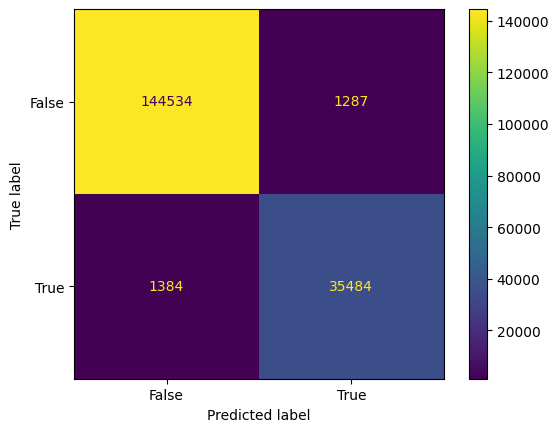

In [12]:
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_tuned.classes_)
disp.plot()
plt.show()